In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':18})


In [185]:
df = pd.read_csv('../data/metadata/2020-05-14_pg1_3_all.csv')
df.head()

,Unnamed: 0,listing_id,image_file,prop_type,listing_price,beds,baths,sqft,address,city,state,zipcode
0,0,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m1108769346x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
1,1,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m867679501xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
2,2,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2412943192x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
3,3,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2841480592x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
4,4,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m758422910xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5572 non-null   int64 
 1   listing_id     5572 non-null   object
 2   image_file     5572 non-null   object
 3   prop_type      5572 non-null   object
 4   listing_price  5572 non-null   object
 5   beds           5572 non-null   object
 6   baths          5572 non-null   object
 7   sqft           5572 non-null   object
 8   address        5572 non-null   object
 9   city           5572 non-null   object
 10  state          5572 non-null   object
 11  zipcode        5572 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 522.5+ KB


In [187]:
count_by_city = df.groupby('city').count()['image_file']
count_by_city



city
Arvada          844
Aurora          796
Centennial      700
Denver         1250
Lakewood        768
Thornton        597
Westminster     617
Name: image_file, dtype: int64

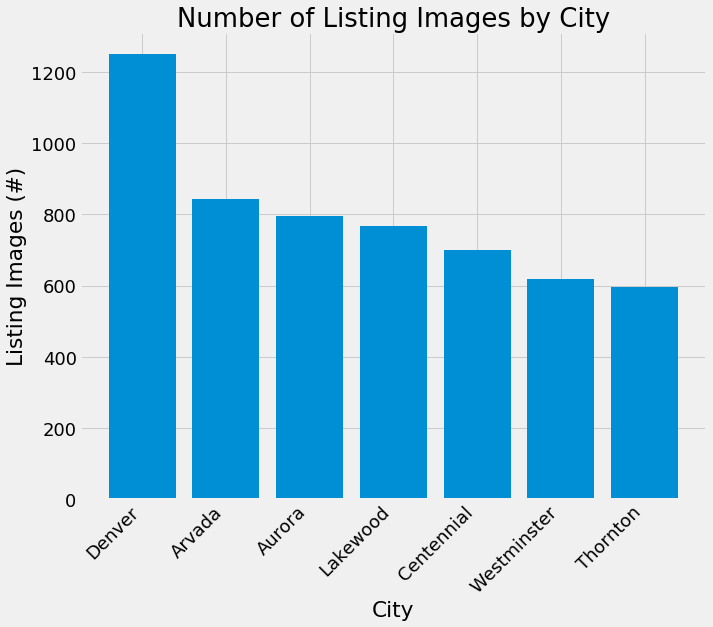

In [188]:
# dist of collected listings
def bar_chart_desc(tick_labels, values, xlabel, ylabel, title):
    desc_idx = np.argsort(np.array(values))
    desc_y = values[desc_idx][::-1]
    desc_x = tick_labels[desc_idx][::-1]


    fig, ax = plt.subplots(1,figsize=(10,8))
    ax.bar(desc_x, desc_y)
    ax.set_xticklabels(desc_x, rotation=45, ha='right')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
def save_fig(file_name):
    plt.savefig('../images/' + file_name, dpi=200)
    plt.close('all')
    
bar_chart_desc(count_by_city.index, count_by_city.values, 'City',"Listing Images (#)", "Number of Listing Images by City")

# save_fig('listings_by_city.png')

In [189]:

num_listings = [df.listing_id[df.city == city].unique().shape[0] for city in count_by_city.index]
print(count_by_city.index)
print(num_listings)

Index(['Arvada', 'Aurora', 'Centennial', 'Denver', 'Lakewood', 'Thornton',
       'Westminster'],
      dtype='object', name='city')
[34, 37, 28, 45, 30, 34, 26]


In [190]:
images_per_listing = count_by_city / np.array(num_listings)

print(f'{images_per_listing}:0:0')
np.mean(images_per_listing)

city
Arvada         24.823529
Aurora         21.513514
Centennial     25.000000
Denver         27.777778
Lakewood       25.600000
Thornton       17.558824
Westminster    23.730769
Name: image_file, dtype: float64:0:0


23.714916209033852

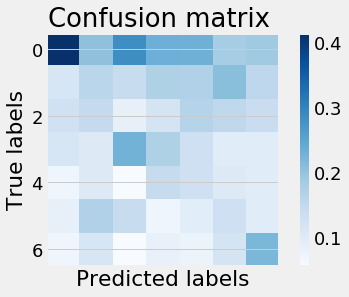

In [191]:
# test prediction on holdout split+ 1 test/train split, MNB classifier 32x32

    cats = ['Denver','Arvada','Aurora','Lakewood','Centennial','Westminster','Thornton']

conf_mat_32 = np.array([[0.41428571, 0.20454545, 0.28571429, 0.23293173, 0.23287671,
        0.18131868, 0.18852459],
       [0.11428571, 0.15909091, 0.14285714, 0.17269076, 0.17123288,
        0.20879121, 0.1557377 ],
       [0.12857143, 0.14772727, 0.08571429, 0.12048193, 0.16438356,
        0.15384615, 0.13934426],
       [0.11428571, 0.10227273, 0.22857143, 0.17269076, 0.13013699,
        0.0989011 , 0.09836066],
       [0.07142857, 0.10227273, 0.05714286, 0.14457831, 0.13013699,
        0.1043956 , 0.09836066],
       [0.08571429, 0.17045455, 0.14285714, 0.07228916, 0.09589041,
        0.13186813, 0.09836066],
       [0.07142857, 0.11363636, 0.05714286, 0.08433735, 0.07534247,
        0.12087912, 0.22131148]])
cm32 = np.round(conf_mat_32, decimals=2)

acc = 0.17825112107623317

k_fold = [2,20,1]
train_acc_mean = [0.22301957709417158,
 0.21539076936179388,
 0.210903841158665,
 0.21006290515299947,
 0.2088847915312256,
 0.2105299082326011,
 0.20965393822216083,
 0.2095016262165401,
 0.20905920359092253,
 0.20845843867251812,
 0.2099861894203231,
 0.20894090347700134,
 0.20878138121529358,
 0.2091412352574892,
 0.2088100875310469,
 0.2088006788208607,
 0.2089111946456151,
 0.20777544700045916]

test = [0.17455265703518094,
 0.17320671950550817,
 0.17522703303250114,
 0.1750018873337259,
 0.17813670327065792,
 0.1752204925096723,
 0.17881652863844327,
 0.17859147025813693,
 0.17476999042676472,
 0.17747037976923036,
 0.17768442840719165,
 0.18082752669218835,
 0.17880590457038084,
 0.1792631761311851,
 0.17678276733451947,
 0.17926552968152693,
 0.18147791418164935,
 0.1799111800231621]


plt.imshow(conf_mat_32, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks()
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

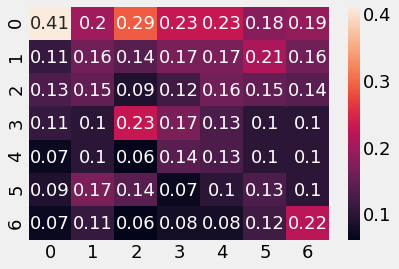

In [192]:
heat_map = sb.heatmap(cm32, annot=True)

plt.show()

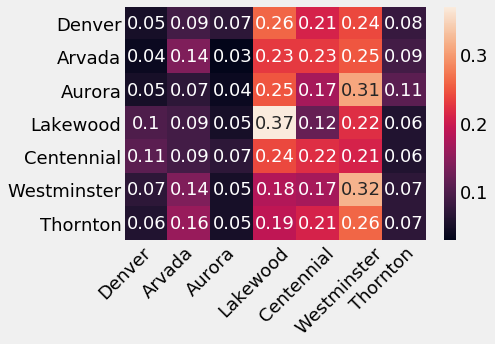

In [212]:
#32 to holdout
cm32 = np.array([[0.0503876 , 0.08527132, 0.06976744, 0.25968992, 0.20930233,
        0.24418605, 0.08139535],
       [0.04      , 0.13714286, 0.02857143, 0.23428571, 0.22857143,
        0.24571429, 0.08571429],
       [0.05298013, 0.07284768, 0.0397351 , 0.25165563, 0.16556291,
        0.31125828, 0.10596026],
       [0.09815951, 0.08588957, 0.04907975, 0.36809816, 0.11656442,
        0.2208589 , 0.06134969],
       [0.10714286, 0.09285714, 0.07142857, 0.24285714, 0.22142857,
        0.20714286, 0.05714286],
       [0.07207207, 0.13513514, 0.04504505, 0.18018018, 0.17117117,
        0.32432432, 0.07207207],
       [0.05982906, 0.16239316, 0.05128205, 0.18803419, 0.21367521,
        0.25641026, 0.06837607]])

cmvals32 = np.array([[13, 22, 18, 67, 54, 63, 21],
       [ 7, 24,  5, 41, 40, 43, 15],
       [ 8, 11,  6, 38, 25, 47, 16],
       [16, 14,  8, 60, 19, 36, 10],
       [15, 13, 10, 34, 31, 29,  8],
       [ 8, 15,  5, 20, 19, 36,  8],
       [ 7, 19,  6, 22, 25, 30,  8]])
y_range = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
cm_32 = np.round(cm32,decimals=2)
heat_map = sb.heatmap(cm_32, annot=True)
plt.xticks(range(len(cats)), labels = cats, rotation=45)
plt.yticks(y_range, labels = cats, rotation=0, ha='right')
plt.show()

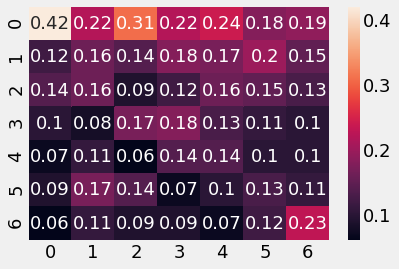

In [194]:
# test prediction on holdout split+ 1 test/train split, MNB classifier 64x64

cats = ['Denver','Arvada','Aurora','Lakewood','Centennial','Westminster','Thornton']

conf_mat_64 = np.array([[0.42028986, 0.21686747, 0.31428571, 0.22177419, 0.23648649,
        0.1827957 , 0.18699187],
       [0.11594203, 0.15662651, 0.14285714, 0.17741935, 0.16891892,
        0.20430108, 0.15447154],
       [0.14492754, 0.15662651, 0.08571429, 0.12096774, 0.16216216,
        0.15053763, 0.1300813 ],
       [0.10144928, 0.08433735, 0.17142857, 0.18145161, 0.12837838,
        0.11290323, 0.09756098],
       [0.07246377, 0.10843373, 0.05714286, 0.14112903, 0.13513514,
        0.10215054, 0.09756098],
       [0.08695652, 0.1686747 , 0.14285714, 0.06854839, 0.10135135,
        0.12903226, 0.10569106],
       [0.05797101, 0.10843373, 0.08571429, 0.08870968, 0.06756757,
        0.11827957, 0.22764228]])


train = [0.22862888253662952,
 0.22447771254925927,
 0.21830806460188254,
 0.21757903654508573,
 0.21610940428140055,
 0.21733575052797427,
 0.21644904018781935,
 0.2159241652043823,
 0.21544109879287593,
 0.21456117929939003,
 0.21588091847394444,
 0.21550360023924198,
 0.21473570074583362,
 0.215038859963872,
 0.2148081482545509,
 0.2148865823984886,
 0.21433556052298045,
 0.21359649265483976]

accuracy = 0.18161434977578475
cm64 = np.round(conf_mat_64,decimals=2)
heat_map = sb.heatmap(cm64, annot=True)
# plt.xticks([cats])
# plt.yticks([cats])
plt.show()

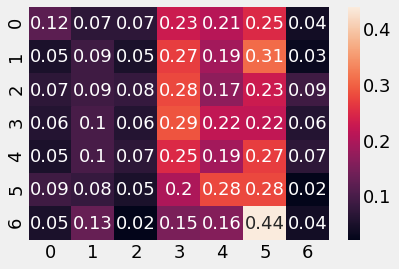

In [195]:
# norm to act
cm64 = np.array([[0.12169312, 0.07407407, 0.07407407, 0.22751323, 0.21164021,
        0.24867725, 0.04232804],
       [0.05369128, 0.09395973, 0.04697987, 0.26845638, 0.19463087,
        0.30872483, 0.03355705],
       [0.06521739, 0.08695652, 0.07971014, 0.27536232, 0.17391304,
        0.23188406, 0.08695652],
       [0.05691057, 0.09756098, 0.05691057, 0.29268293, 0.2195122 ,
        0.2195122 , 0.05691057],
       [0.04672897, 0.10280374, 0.07476636, 0.25233645, 0.18691589,
        0.27102804, 0.06542056],
       [0.08695652, 0.07608696, 0.05434783, 0.19565217, 0.2826087 ,
        0.2826087 , 0.02173913],
       [0.05376344, 0.12903226, 0.02150538, 0.15053763, 0.16129032,
        0.44086022, 0.04301075]])
cm_64 = np.round(cm64,decimals=2)
heat_map = sb.heatmap(cm_64, annot=True)
# plt.xticks([cats])
# plt.yticks([cats])
plt.show()

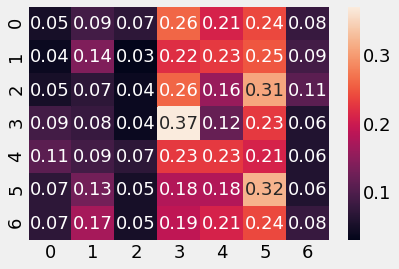

In [196]:
# on holdout
cm64=np.array([[0.0503876 , 0.08914729, 0.06976744, 0.26356589, 0.20542636,
        0.24031008, 0.08139535],
       [0.04      , 0.13714286, 0.02857143, 0.22285714, 0.23428571,
        0.25142857, 0.08571429],
       [0.05298013, 0.06622517, 0.0397351 , 0.26490066, 0.1589404 ,
        0.31125828, 0.10596026],
       [0.09202454, 0.0797546 , 0.04294479, 0.37423313, 0.12269939,
        0.23312883, 0.05521472],
       [0.11428571, 0.09285714, 0.07142857, 0.22857143, 0.22857143,
        0.20714286, 0.05714286],
       [0.07207207, 0.12612613, 0.05405405, 0.18018018, 0.18018018,
        0.32432432, 0.06306306],
       [0.06837607, 0.17094017, 0.05128205, 0.18803419, 0.20512821,
        0.23931624, 0.07692308]])
cm_64 = np.round(cm64,decimals=2)
heat_map = sb.heatmap(cm_64, annot=True)
# plt.xticks([cats])
# plt.yticks([cats])
plt.show()

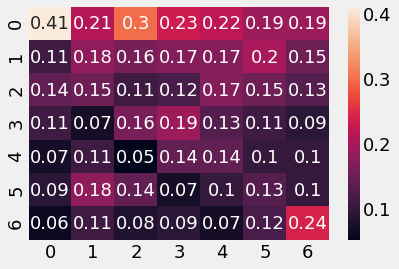

In [197]:
# test prediction on holdout split+ 1 test/train split, MNB classifier 128x128

cats = ['Denver','Arvada','Aurora','Lakewood','Centennial','Westminster','Thornton']

conf_mat_128 = np.array([[0.41428571, 0.21176471, 0.2972973 , 0.2310757 , 0.22068966,
        0.18817204, 0.18644068],
       [0.11428571, 0.17647059, 0.16216216, 0.17131474, 0.16551724,
        0.20430108, 0.15254237],
       [0.14285714, 0.15294118, 0.10810811, 0.11952191, 0.16551724,
        0.15053763, 0.12711864],
       [0.11428571, 0.07058824, 0.16216216, 0.187251  , 0.13103448,
        0.10752688, 0.09322034],
       [0.07142857, 0.10588235, 0.05405405, 0.13545817, 0.14482759,
        0.10215054, 0.10169492],
       [0.08571429, 0.17647059, 0.13513514, 0.06772908, 0.10344828,
        0.12903226, 0.10169492],
       [0.05714286, 0.10588235, 0.08108108, 0.0876494 , 0.06896552,
        0.11827957, 0.23728814]])


train = [0.23468671897212603,
 0.2239920075586902,
 0.2212697677576123,
 0.22096844358514017,
 0.2200530296420636,
 0.2207557655250946,
 0.2195855019899279,
 0.21947493055787037,
 0.21917923556209687]

test = [0.17612347197421294,
 0.17971415575110095,
 0.17926039864128693,
 0.18218237421414002,
 0.17723837355771652,
 0.18037863857249128,
 0.18307083287564743,
 0.1817183350094118,
 0.1843982630272953]

cm128 = np.round(conf_mat_128,decimals=2)
heat_map = sb.heatmap(cm128, annot=True)
# plt.xticks([cats])
# plt.yticks([cats])
plt.show()

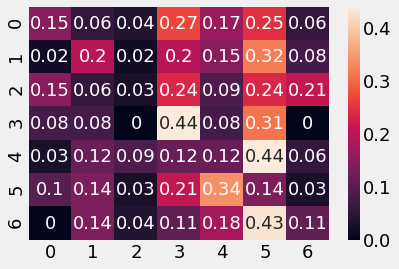

In [198]:
cats = ['Denver','Arvada','Aurora','Lakewood','Centennial','Westminster','Thornton']

conf_128 = np.array([[0.14583333, 0.0625    , 0.04166667, 0.27083333, 0.16666667,
        0.25      , 0.0625    ],
       [0.025     , 0.2       , 0.025     , 0.2       , 0.15      ,
        0.325     , 0.075     ],
       [0.14705882, 0.05882353, 0.02941176, 0.23529412, 0.08823529,
        0.23529412, 0.20588235],
       [0.08333333, 0.08333333, 0.        , 0.44444444, 0.08333333,
        0.30555556, 0.        ],
       [0.03125   , 0.125     , 0.09375   , 0.125     , 0.125     ,
        0.4375    , 0.0625    ],
       [0.10344828, 0.13793103, 0.03448276, 0.20689655, 0.34482759,
        0.13793103, 0.03448276],
       [0.        , 0.14285714, 0.03571429, 0.10714286, 0.17857143,
        0.42857143, 0.10714286]])
cm128 = np.round(conf_128,decimals=2)
heat_map = sb.heatmap(cm128, annot=True)
# plt.xticks([cats])
# plt.yticks([cats])
plt.show()

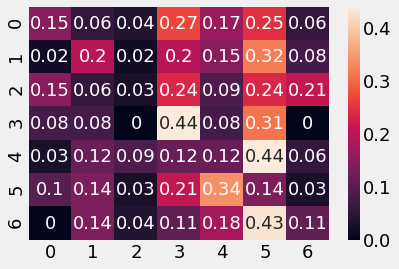

In [199]:
# test prediction on holdout split+ 1 test/train split, MNB classifier 256x256

cats = ['Denver','Arvada','Aurora','Lakewood','Centennial','Westminster','Thornton']

conf_mat_256 = np.array([[0.41428571, 0.21428571, 0.28947368, 0.22821577, 0.22727273,
        0.18716578, 0.18644068],
       [0.11428571, 0.16666667, 0.15789474, 0.1659751 , 0.17532468,
        0.20320856, 0.16101695],
       [0.14285714, 0.1547619 , 0.10526316, 0.12448133, 0.15584416,
        0.14973262, 0.12711864],
       [0.11428571, 0.07142857, 0.15789474, 0.19502075, 0.12337662,
        0.10695187, 0.09322034],
       [0.07142857, 0.10714286, 0.05263158, 0.13692946, 0.14285714,
        0.10160428, 0.10169492],
       [0.08571429, 0.17857143, 0.15789474, 0.06639004, 0.0974026 ,
        0.12834225, 0.10169492],
       [0.05714286, 0.10714286, 0.07894737, 0.08298755, 0.07792208,
        0.12299465, 0.22881356]])




cm256 = np.round(conf_mat_256,decimals=2)
heat_map = sb.heatmap(cm128, annot=True)
# plt.xticks([cats])
# plt.yticks([cats])
plt.show()

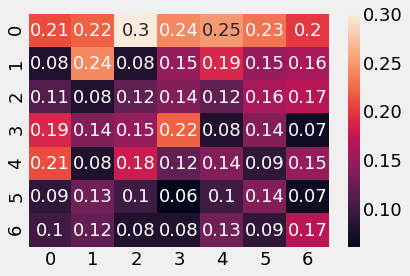

In [200]:
# 128 on holdout data
acc =  0.17757847533632287

cats = ['Denver','Arvada','Aurora','Lakewood','Centennial','Westminster','Thornton']

conf_holdout = np.array([[0.20560748, 0.21698113, 0.3       , 0.23571429, 0.24747475,
        0.234375  , 0.203125  ],
       [0.08411215, 0.23584906, 0.075     , 0.14642857, 0.18686869,
        0.15234375, 0.1640625 ],
       [0.11214953, 0.0754717 , 0.125     , 0.14285714, 0.12121212,
        0.15625   , 0.171875  ],
       [0.18691589, 0.14150943, 0.15      , 0.21785714, 0.08080808,
        0.140625  , 0.0703125 ],
       [0.21495327, 0.0754717 , 0.175     , 0.11785714, 0.13636364,
        0.08984375, 0.1484375 ],
       [0.09345794, 0.13207547, 0.1       , 0.06428571, 0.1010101 ,
        0.140625  , 0.0703125 ],
       [0.10280374, 0.12264151, 0.075     , 0.075     , 0.12626263,
        0.0859375 , 0.171875  ]])

cm = np.round(conf_holdout,decimals=2)
heat_map = sb.heatmap(cm, annot=True)
# plt.xticks([cats])
# plt.yticks([cats])
plt.show()

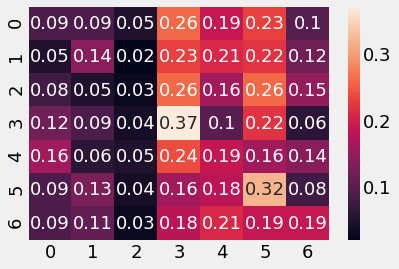

In [201]:
cats = ['Denver','Arvada','Aurora','Lakewood','Centennial','Westminster','Thornton']

norm_by_act = np.array([[0.08527132, 0.08914729, 0.04651163, 0.25581395, 0.18992248,
        0.23255814, 0.10077519],
       [0.05142857, 0.14285714, 0.01714286, 0.23428571, 0.21142857,
        0.22285714, 0.12      ],
       [0.0794702 , 0.05298013, 0.03311258, 0.26490066, 0.1589404 ,
        0.26490066, 0.14569536],
       [0.12269939, 0.09202454, 0.03680982, 0.37423313, 0.09815951,
        0.2208589 , 0.05521472],
       [0.16428571, 0.05714286, 0.05      , 0.23571429, 0.19285714,
        0.16428571, 0.13571429],
       [0.09009009, 0.12612613, 0.03603604, 0.16216216, 0.18018018,
        0.32432432, 0.08108108],
       [0.09401709, 0.11111111, 0.02564103, 0.17948718, 0.21367521,
        0.18803419, 0.18803419]])
cm = np.round(norm_by_act,decimals=2)
heat_map = sb.heatmap(cm, annot=True)
# plt.xticks([cats])
# plt.yticks([cats])
plt.show()

# look at this rep for others

In [202]:
df.head()


,Unnamed: 0,listing_id,image_file,prop_type,listing_price,beds,baths,sqft,address,city,state,zipcode
0,0,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m1108769346x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
1,1,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m867679501xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
2,2,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2412943192x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
3,3,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2841480592x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
4,4,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m758422910xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015


In [210]:
df.sqft.astype(float)


ValueError: could not convert string to float: '1,061'

In [204]:
by_type = df.groupby(['prop_type']).count()
by_type

,Unnamed: 0,listing_id,image_file,listing_price,beds,baths,sqft,address,city,state,zipcode
prop_type,,,,,,,,,,,
House for Sale,3605,3605,3605,3605,3605,3605,3605,3605,3605,3605,3605
Listing for Sale,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476
Mfd/Mobile Home,19,19,19,19,19,19,19,19,19,19,19
Multi-Family Home,472,472,472,472,472,472,472,472,472,472,472


In [205]:
test = df[df.prop_type == 'House for Sale']

In [206]:
test.head()

,Unnamed: 0,listing_id,image_file,prop_type,listing_price,beds,baths,sqft,address,city,state,zipcode
0,0,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m1108769346x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
1,1,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m867679501xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
2,2,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2412943192x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
3,3,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2841480592x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
4,4,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m758422910xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015


In [211]:
t3 = [int(elem) for elem in test.sqft]

ValueError: invalid literal for int() with base 10: '2,066'

In [207]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3605 entries, 0 to 5571
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3605 non-null   int64 
 1   listing_id     3605 non-null   object
 2   image_file     3605 non-null   object
 3   prop_type      3605 non-null   object
 4   listing_price  3605 non-null   object
 5   beds           3605 non-null   object
 6   baths          3605 non-null   object
 7   sqft           3605 non-null   object
 8   address        3605 non-null   object
 9   city           3605 non-null   object
 10  state          3605 non-null   object
 11  zipcode        3605 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 366.1+ KB


In [ ]:
df.listing_price